In [23]:
import pandas as pd


df = pd.read_csv("global_synthetic_demand_data.csv")

print(df.columns)
print(df.head())


Index(['Demand', 'Latitude', 'Longitude'], dtype='object')
   Demand   Latitude   Longitude
0     114 -71.775269  126.097054
1    4094  -5.558833   18.021840
2     328 -34.713094  -61.627457
3    4652  37.190740 -169.648399
4     264   9.858492   97.913775


In [24]:
df.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)


In [25]:
df

Demand   latitude   longitude
0        114 -71.775269  126.097054
1       4094  -5.558833   18.021840
2        328 -34.713094  -61.627457
3       4652  37.190740 -169.648399
4        264   9.858492   97.913775
...      ...        ...         ...
4995    3341  49.558002 -122.690929
4996    3513 -43.586041   60.920024
4997    1655   5.481837 -141.169178
4998    4863 -78.910151  107.837476
4999     343   5.916604  160.593566

[5000 rows x 3 columns]

In [26]:
df.columns

Index(['Demand', 'latitude', 'longitude'], dtype='object')

In [28]:
df['Demand'] 


0        114
1       4094
2        328
3       4652
4        264
        ... 
4995    3341
4996    3513
4997    1655
4998    4863
4999     343
Name: Demand, Length: 5000, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler


X = df[['latitude', 'longitude', 'Demand']]


scaler = StandardScaler()
X['Demand_scaled'] = scaler.fit_transform(X[['Demand']])


X = X[['latitude', 'longitude', 'Demand_scaled']]


C:\Users\singh\AppData\Local\Temp\ipykernel_18628\3638586661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Demand_scaled'] = scaler.fit_transform(X[['Demand']])


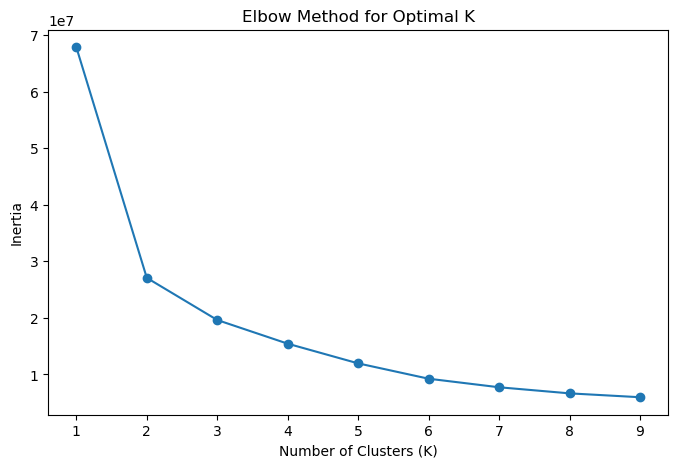

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertia = []
K_values = range(1, 10) 

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [36]:

optimal_k = 10  


kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)


cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:", cluster_centers)


Cluster Centers: [[ 4.95765838e+01  1.38998684e+02 -3.47424504e-02]
 [ 4.87667561e+01 -7.03755180e+01 -4.04414969e-02]
 [-6.14047560e+01  3.82968785e+01  2.35662296e-02]
 [ 6.34430285e+01  3.61492067e+01  6.08915707e-02]
 [-4.13543765e+01 -1.39317270e+02  6.10223512e-02]
 [-4.86215179e+01  1.37585503e+02 -5.00700949e-02]
 [ 5.12664772e-01  7.95880485e+01  1.78922768e-02]
 [-5.25670673e+01 -5.73116249e+01 -2.07872514e-02]
 [ 1.15562546e+01 -1.13215004e+01 -2.30802398e-02]
 [ 4.73060961e+01 -1.42748144e+02  2.56739429e-02]]


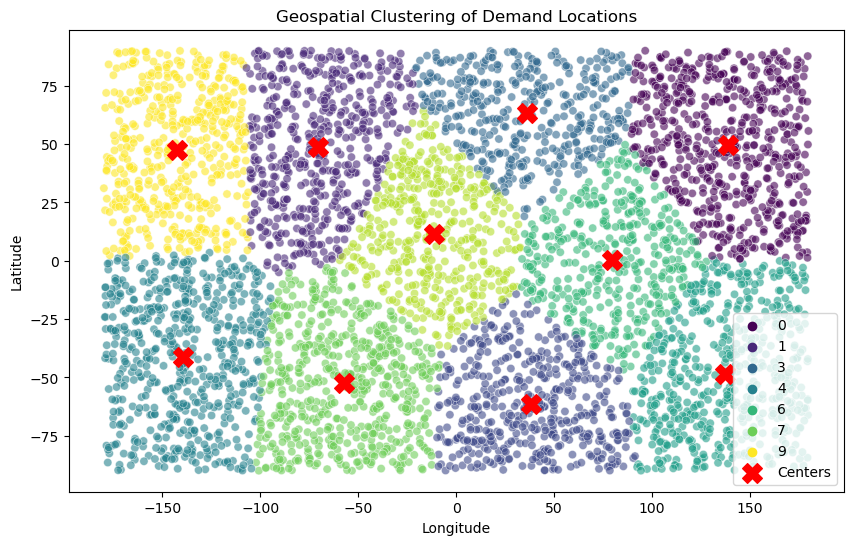

In [37]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['cluster'], palette="viridis", alpha=0.6)
plt.scatter(cluster_centers[:,1], cluster_centers[:,0], c='red', marker='X', s=200, label='Centers')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.title("Geospatial Clustering of Demand Locations")
plt.show()


In [39]:
import numpy as np

weighted_centers = []

for cluster_id in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_id]
    
  
    weighted_lat = np.average(cluster_data['latitude'], weights=cluster_data['Demand'])
    weighted_long = np.average(cluster_data['longitude'], weights=cluster_data['Demand'])
    
    weighted_centers.append((weighted_lat, weighted_long))

print("Weighted Centroids:", weighted_centers)


Weighted Centroids: [(50.108284352808084, 138.71486747266331), (48.007965546323575, -70.54499031293173), (-61.12669306941399, 38.44372096229798), (62.602928424646905, 36.780352603476246), (-41.304091098590305, -138.71631585386191), (-49.56349815475631, 138.22363298532355), (1.246785395245353, 78.89632582432274), (-51.72042207283803, -57.81113375049996), (10.9162873177633, -11.164596919648385), (48.37344696054535, -143.53668275897132)]


In [41]:
pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/fc/ab/d1f47c48a14e17cd487c8b467b573291fae75477b067241407e7889a3692/folium-0.19.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   ------- ------------------------------- 20.5/110.5 kB 330.3 kB/s eta 0:00:01
   ------------------ -------------------- 51.2/110.5 kB 435.7 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.5 kB 653.6 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.5 kB 653.6 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.5 kB 653

In [45]:
print(weighted_centers)


[(0, 50.108284352808084, 138.71486747266331), (1, 48.007965546323575, -70.54499031293173), (2, -61.12669306941399, 38.44372096229798), (3, 62.602928424646905, 36.780352603476246), (4, -41.304091098590305, -138.71631585386191), (5, -49.56349815475631, 138.22363298532355), (6, 1.246785395245353, 78.89632582432274), (7, -51.72042207283803, -57.81113375049996), (8, 10.9162873177633, -11.164596919648385), (9, 48.37344696054535, -143.53668275897132)]


In [46]:
import numpy as np

weighted_centers = []

for cluster_id in range(optimal_k):  
    cluster_data = df[df['cluster'] == cluster_id]  

    if cluster_data.empty:
        continue

    weighted_lat = np.average(cluster_data['latitude'], weights=cluster_data['Demand'])  
    weighted_long = np.average(cluster_data['longitude'], weights=cluster_data['Demand'])  

    weighted_centers.append((cluster_id, weighted_lat, weighted_long))  
print("Weighted Centroids:", weighted_centers)  


Weighted Centroids: [(0, 50.108284352808084, 138.71486747266331), (1, 48.007965546323575, -70.54499031293173), (2, -61.12669306941399, 38.44372096229798), (3, 62.602928424646905, 36.780352603476246), (4, -41.304091098590305, -138.71631585386191), (5, -49.56349815475631, 138.22363298532355), (6, 1.246785395245353, 78.89632582432274), (7, -51.72042207283803, -57.81113375049996), (8, 10.9162873177633, -11.164596919648385), (9, 48.37344696054535, -143.53668275897132)]


In [47]:
import folium


map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)


for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['Demand'] / df['Demand'].max() * 10,  
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(m)


for cluster_data in weighted_centers:
    if len(cluster_data) == 3: 
        cluster_id, lat, long = cluster_data 
        folium.Marker(
            location=[lat, long],
            popup=f"Cluster {cluster_id} (Centroid)",
            icon=folium.Icon(color="red", icon="info-sign")
        ).add_to(m)


m


In [49]:
from sklearn.cluster import KMeans

# Define number of clusters
optimal_k = 10  

# Fit K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [50]:
import numpy as np

weighted_centers = []

for cluster_id in range(10):  
    cluster_data = df[df['cluster'] == cluster_id]

    if cluster_data.empty: 
        continue

    weighted_lat = np.average(cluster_data['latitude'], weights=cluster_data['Demand'])
    weighted_long = np.average(cluster_data['longitude'], weights=cluster_data['Demand'])

    weighted_centers.append((cluster_id, weighted_lat, weighted_long))  

print("Weighted Centroids:", weighted_centers)  


Weighted Centroids: [(0, 45.6035362853662, 5.201613515663159), (1, -48.84064126592728, -86.42496419528864), (2, -49.46475418039178, 52.2491602071376), (3, -43.88563095894617, -20.28439668380536), (4, -45.22248597944982, 135.3612407438499), (5, 43.232922292103034, 81.26265020730136), (6, 43.410995110286045, -68.42212010722203), (7, 46.51574340547403, 148.41646026595114), (8, -39.35012240576755, -147.69772233691975), (9, 49.36639088802994, -142.92211186266624)]


In [51]:
import folium


map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)


for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['Demand'] / df['Demand'].max() * 10, 
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(m)

for cluster_id, lat, long in weighted_centers:
    folium.Marker(
        location=[lat, long],
        popup=f"Cluster {cluster_id} (Centroid)",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)


m
